Download datasets

In [2]:
#!pip install wget intel-numpy intel-scipy intel-scikit-learn pydaal tbb4py

  Could not find a version that satisfies the requirement intel-numpy (from versions: )
No matching distribution found for intel-numpy


In [87]:
#import libraries
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import requests 
import pandas as pd
import dask.dataframe as pd_dd
import zipfile
import io
import wget
from shapely.geometry import Point
import geopandas as gpd
import random
import json
from fiona.crs import from_epsg
#import pysal as ps
import pylab as pl
import matplotlib.pyplot as plt

In [5]:
#311 data
url1 = "https://data.cityofnewyork.us/api/views/fvrb-kbbt/rows.csv?accessType=DOWNLOAD"
#linknyc locations
url2 = "https://data.cityofnewyork.us/api/views/s4kf-3yrf/rows.csv?accessType=DOWNLOAD"
#linknyc usage statistics
url3 = "https://data.cityofnewyork.us/api/views/69wu-b929/rows.csv?accessType=DOWNLOAD"
#linknyc kiosk status
url4 = "https://data.cityofnewyork.us/api/views/8s5k-n45n/rows.csv?accessType=DOWNLOAD"
#linknyc new site permit locations
url5 = "https://data.cityofnewyork.us/api/views/xp25-gxux/rows.csv?accessType=DOWNLOAD"
#nyc wi-fi hotspot locations
url6 = "https://data.cityofnewyork.us/api/views/yjub-udmw/rows.csv?accessType=DOWNLOAD"
#output_path="/nfshome/msm796/capstone"
#output_path=r"C:\Users\Marvin\Documents\capstone"
output_path=r"C:\Users\Marvin\Google Drive\NYU CUSP Capstone 2019\Marvin\Output"
input_path=r"C:\Users\Marvin\Google Drive\NYU CUSP Capstone 2019\Marvin\Input"

In [6]:
from multiprocessing import Pool

def downloadfiles(url,outpath):
    wget.download(url, out=outpath)

#f __name__ == '__main__':
#   p = Pool(10)
#   p.starmap(downloadfiles, [(eval("url{}".format(x)),output_path)for x in range(1,7)])

In [12]:
LINKNYC_kiosk_status = pd.read_csv(input_path+"/LinkNYC_Kiosk_Status__Historical_.csv")
LINKNYC_kiosk_loc = pd.read_csv(input_path+"/LinkNYC_Locations.csv")
LINKNYC_kiosk_permit_app = pd.read_csv(input_path+"/LinkNYC_New_Site_Permit_Applications.csv")
LINKNYC_kiosk_usage_stats = pd.read_csv(input_path+"/LinkNYC_Usage_Statistics.csv")
NYC_wifi_hotspot = pd.read_csv(input_path+"/NYC_Wi-Fi_Hotspot_Locations.csv")
dataset311 = pd.read_csv(input_path+"/311_Service_Requests.csv",low_memory=False,dtype={'Bridge Highway Direction': 'object',
       'Bridge Highway Name': 'object',
       'Bridge Highway Segment': 'object',
       'Incident Zip': 'object',
       'Landmark': 'object',
       'Road Ramp': 'object',
       'Taxi Company Borough': 'object',
       'Vehicle Type': 'object'})

In [4]:
#LINKNYC_kiosk_status = pd_dd.read_csv(output_path+"/LinkNYC_Kiosk_Status__Historical_.csv")
#LINKNYC_kiosk_loc = pd_dd.read_csv(output_path+"/LinkNYC_Locations.csv")
#LINKNYC_kiosk_permit_app = pd_dd.read_csv(output_path+"/LinkNYC_New_Site_Permit_Applications.csv")
#LINKNYC_kiosk_usage_stats = pd_dd.read_csv(output_path+"/LinkNYC_Usage_Statistics.csv")
#NYC_wifi_hotspot = pd_dd.read_csv(output_path+"/NYC_Wi-Fi_Hotspot_Locations.csv")
#dataset311 = pd_dd.read_csv(output_path+"/311_Service_Requests.csv",low_memory=False,dtype={'Bridge Highway Direction': 'object',
       'Bridge Highway Name': 'object',
       'Bridge Highway Segment': 'object',
       'Incident Zip': 'object',
       'Landmark': 'object',
       'Road Ramp': 'object',
       'Taxi Company Borough': 'object',
       'Vehicle Type': 'object'})

In [5]:
dataset311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38019984,12/26/2017 09:01:42 PM,01/16/2018 09:32:46 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,SEWAGE,RESIDENTIAL BUILDING,11419,114-03 95 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691276,-73.831190,"(40.691275940162626, -73.83118954136187)"
1,38019985,12/26/2017 06:34:20 PM,01/26/2018 02:50:34 PM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,DAMP SPOT,RESIDENTIAL BUILDING,10014,51 MORTON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730836,-74.005589,"(40.73083636079352, -74.0055889792907)"
2,39173435,05/12/2018 09:07:00 AM,05/14/2018 12:00:00 PM,DSNY,Queens East 12,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11413,189-02 NASHVILLE BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683096,-73.755858,"(40.683095827955924, -73.75585790304673)"
3,38138183,01/06/2018 03:50:00 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11226,170 PARKSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.654633,-73.962497,"(40.654632859395576, -73.96249677995594)"
4,39064838,04/30/2018 03:42:14 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,10031,469 WEST 146 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825597,-73.946361,"(40.825597008138715, -73.9463611640844)"


In [6]:
len(dataset311)

20020939

In [7]:
dataset311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [8]:
NYC_wifi_hotspot.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,82,3,Free,NYCHA,0,331 Myrtle Ave,40.693442,-73.973193,9.916838e+05,191917.129995,...,Fort Greene,35,11205,302,18501,18501,3335255,3020410001,665,"(40.693442, -73.973193)"
1,135,4,Free,AT&T,Astoria Park,"Track, Ballfields",40.777000,-73.925200,1.004967e+06,222367.720997,...,park-cemetery-etc-Queens,22,11105,401,99,99,0,4008980001,943,"(40.777, -73.9252)"
2,136,4,Free,AT&T,Macdonald Park,Entire Park,40.722100,-73.846600,1.026771e+06,202394.268818,...,Forest Hills,29,11375,406,711,711,0,0,944,"(40.7221, -73.8466)"
3,137,5,Free,AT&T,Clove Lakes Park,Area near Ballfields,40.617300,-74.106300,9.547385e+05,164193.325207,...,Westerleigh,49,10301,501,147,147,0,5003190001,945,"(40.6173, -74.1063)"
4,8641,4,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-25 41 AVENUE,40.755727,-73.944583,9.996032e+05,214613.274563,...,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,25,4433386,4004700100,4746,"(40.755727, -73.944583)"


In [9]:
NYC_wifi_hotspot.columns

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Name', 'Location',
       'Latitude', 'Longitude', 'X', 'Y', 'Location_T', 'Remarks', 'City',
       'SSID', 'SourceID', 'Activated', 'BoroCode', 'Borough Name',
       'Neighborhood Tabulation Area Code (NTACODE)',
       'Neighborhood Tabulation Area (NTA)', 'Council Distrcit', 'Postcode',
       'BoroCD', 'Census Tract', 'BCTCB2010', 'BIN', 'BBL', 'DOITT_ID',
       'Location (Lat, Long)'],
      dtype='object')

In [30]:
#create geopanda-able longlats
NYC_wifi_hotspot['lonlat'] = list(zip(NYC_wifi_hotspot.Longitude, NYC_wifi_hotspot.Latitude))
NYC_wifi_hotspot['geometry'] = NYC_wifi_hotspot[['lonlat']].applymap(lambda x:Point(x))
# Convert to a GeoDataFrame
NYC_wifi_hotspot = gpd.GeoDataFrame(NYC_wifi_hotspot, geometry="geometry")

# set crs
NYC_wifi_hotspot.crs = {'init': 'epsg:4326'}

LINKNYC_kiosk_usage_stats.head()

In [16]:
LINKNYC_kiosk_status.head()

,UNIQUE_ID,PUBLISH_DATE,SITE ID,STATUS,PPT ID,ADDRESS,CITY,STATE,ZIP,BORO,...,INSTALL_DATE,ACTIVE_DATE,WIFI_STATUS,TABLET_STATUS,PHONE_STATUS,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,NTA,NTA_NAME
0,20181120_041521.mn-03-139623,11/20/2018 04:15:21 AM,mn-03-139623,Link Active!,139623,401 EAST 12 STREET,New York,NY,10009,Manhattan,...,07/29/2017 12:00:00 AM,02/15/2018 12:00:00 AM,up,up,up,3.0,2.0,34.0,MN22,East Village
1,20181120_041521.mn-10-134720,11/20/2018 04:15:21 AM,mn-10-134720,Link Active!,134720_134721,2534 ADAM CLAYTON POWELL JR. BOULEVARD,New York,NY,10039,Manhattan,...,08/19/2017 12:00:00 AM,09/21/2017 12:00:00 AM,up,up,up,NaN,NaN,NaN,NaN,NaN
2,20181120_041521.mn-10-134604,11/20/2018 04:15:21 AM,mn-10-134604,Link Active!,134604_134606,2022 ADAM CLAYTON POWELL JR. BOULEVARD,New York,NY,10027,Manhattan,...,07/19/2017 12:00:00 AM,09/12/2017 12:00:00 AM,up,up,up,NaN,NaN,NaN,NaN,NaN
3,20181120_041521.mn-10-134578,11/20/2018 04:15:21 AM,mn-10-134578,Link Active!,134578,2380 ADAM CLAYTON POWELL JR. BOULEVARD,New York,NY,10030,Manhattan,...,08/13/2017 12:00:00 AM,09/15/2017 12:00:00 AM,up,down,up,NaN,NaN,NaN,NaN,NaN
4,20181120_041521.mn-10-133684,11/20/2018 04:15:21 AM,mn-10-133684,Link Active!,133684,2538 ADAM CLAYTON POWELL JR. BOULEVARD,New York,NY,10039,Manhattan,...,08/25/2017 12:00:00 AM,09/22/2017 12:00:00 AM,up,up,up,NaN,NaN,NaN,NaN,NaN


In [17]:
LINKNYC_kiosk_loc.head()

,CB Link ID,Borough,Community Board,Council District,Latitude,Longitude,Project Status,Smallest PPT,Street Address,Postcode,...,Link Installation (A),Neighborhood Tabulation Area (NTA),Building Identification Number (BIN),Borough-Block-Lot (BBL),Census Tract (CT),Cross Street 1,Cross Street 2,IxN Corner,GF Permit Application ID,Location
0,LINK-000498,Manhattan,104,3,40.767358,-73.982564,Live,144139,989 8 AVENUE,10019,...,07/20/2016,Clinton,1026054,1010480033,1013900,WEST 57 STREET,WEST 58 STREET,SW,NaN,"(40.76735759, -73.98256354)"
1,LINK-012278,Manhattan,106,2,40.747055,-73.981061,Live,133555,99 EAST 34 STREET,10016,...,03/03/2018,Murray Hill-Kips Bay,1017084,1008900001,1007200,PARK AVENUE,LEXINGTON AVENUE,NE,NaN,"(40.74705459, -73.98106107)"
2,LINK-013157,Manhattan,110,9,40.801949,-73.949259,Live,138528,99 WEST 116 STREET,10026,...,12/21/2016,Central Harlem South,1085936,1016007501,1019000,LENOX AVENUE,5 AVENUE,NE,NaN,"(40.80194888, -73.9492591)"
3,LINK-018041,Queens,406,29,40.726695,-73.853929,Live,145847,99-40 67 AVENUE,11374,...,05/20/2017,Forest Hills,4075136,4031700027,4071306,QUEENS BOULEVARD,BOOTH STREET,SE,81461.0,"(40.726695, -73.853929)"
4,LINK-000369,Manhattan,108,4,40.761604,-73.966388,Live,121734,991 3 AVENUE,10022,...,02/27/2016,Lenox Hill-Roosevelt Island,1043336,1014140001,1011000,EAST 59 STREET,EAST 60 STREET,NE,NaN,"(40.76160412, -73.9663883)"


Download geo-stuff

In [31]:
NYC_wifi_hotspot.Type.unique()

array(['Free', 'Limited Free', 'Partner Site'], dtype=object)

In [32]:
url = 'https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile'
#when you download from the website, it assigns a randomized filename. need to figure out how to generalize this#
#create new folder, unzip there and use find shapefile?#
#r = requests.get(url, stream=True)
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall(output_path)

In [33]:
filename = "geo_export_ba3ea3cb-cf7a-4165-a569-b8e93d5eb73e.shp"
censustractshp = gpd.GeoDataFrame.from_file(input_path+"/"+filename)

In [34]:
NYC_wifi_hotspot_free=NYC_wifi_hotspot[NYC_wifi_hotspot.Type=='Free']

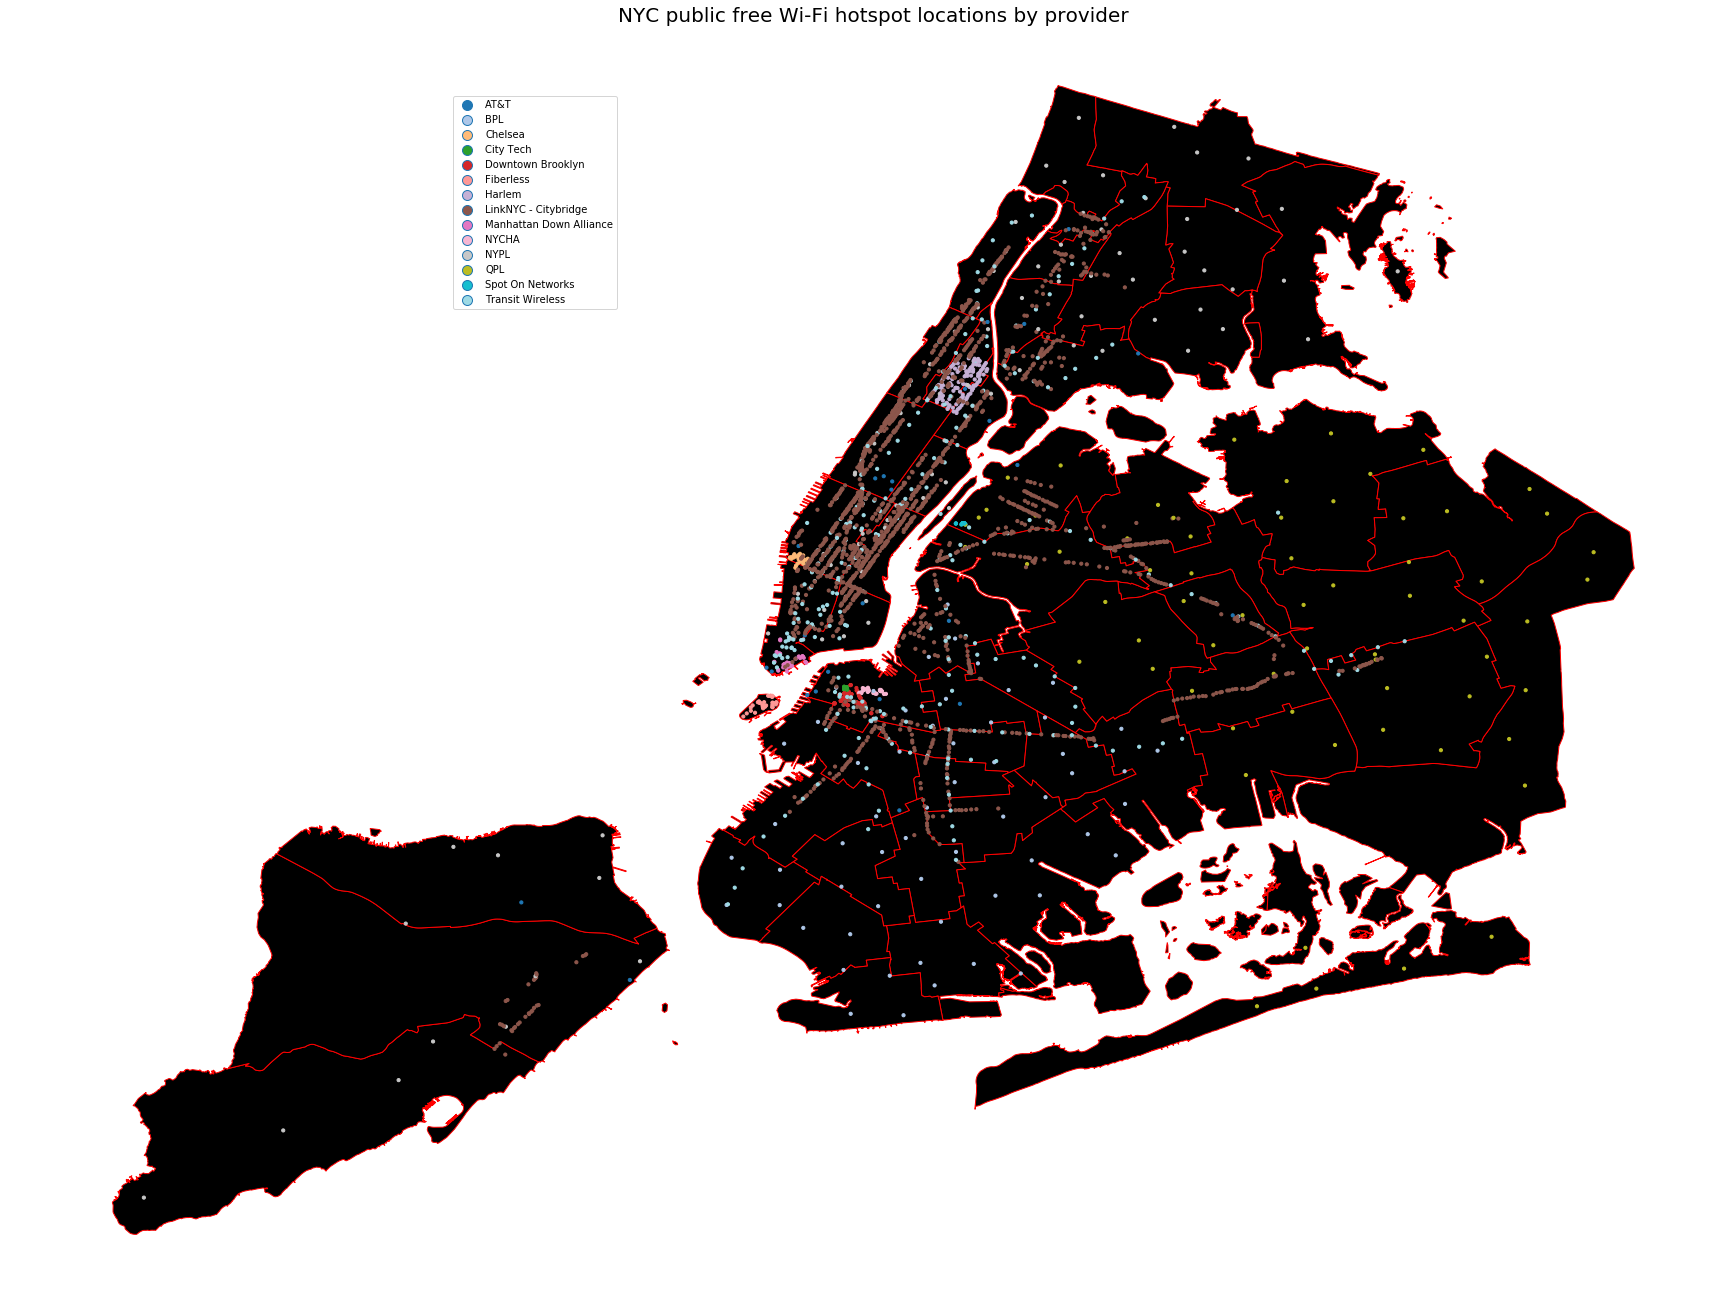

In [35]:
fig = pl.figure(figsize = (30,30))
ax = fig.add_subplot(111)
censustractshp.plot(ax=ax, color="black", edgecolor="red", lw=1)
NYC_wifi_hotspot_free.plot(ax=ax, column=NYC_wifi_hotspot_free.Provider,legend=True, categorical=True,cmap=plt.cm.get_cmap('tab20', len(NYC_wifi_hotspot_free.Provider)),markersize=10)
ax.set_title('NYC public free Wi-Fi hotspot locations by provider', fontsize=20)
ax.axis('off')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
pl.savefig(output_path+"/nyc_public_wifi_hotspot_locs.png",dpi=100)
pl.show()

In [89]:
filename = "geo_export_ba3ea3cb-cf7a-4165-a569-b8e93d5eb73e.shp"
pumashp = gpd.GeoDataFrame.from_file(input_path+"/"+filename)

In [90]:
#begin data exploration of super demographics table
input_file = r"C:\Users\Marvin\Google Drive\NYU CUSP Capstone 2019\Marvin\Input\aff_batch1\clean_batch1\demographics_base_table_batch1.csv"
demog_batch1 = pd.read_csv(input_file)

In [91]:
demog_batch1.head()

,id,id2,geography,PUMA,estimate_female,estimate_female__10_to_14_years,estimate_female__15_to_17_years,estimate_female__18_and_19_years,estimate_female__20_years,estimate_female__21_years,...,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__american_indian_and_alaska_native_alone,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__asian_alone,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__black_or_african_american_alone,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__hispanic_or_latino_origin_of_any_race,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__native_hawaiian_and_other_pacific_islander_alone,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__some_other_race_alone,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__two_or_more_races,with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__white_alone,"with_a_computer___without_an_internet_subscription_estimate_race_and_hispanic_or_latino_origin__white_alone,_not_hispanic_or_latino",with_a_computer___without_an_internet_subscription_estimate_total_population_in_households
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",3701,58730,2443,1212,947,929,1058,...,12,269,1553,3596,43,2944,124,2185,1629,7130
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",3702,80015,4590,3120,2151,1307,1474,...,249,553,12271,3394,32,1822,342,1466,460,16735
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",3703,65827,2782,1794,1250,1206,768,...,0,224,4409,2493,0,1029,92,3555,2319,9309
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,3704,67400,3622,2343,1223,888,818,...,100,727,3823,7494,0,4748,271,4183,2227,13852
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,93685,6670,3750,3759,1910,1607,...,76,45,10924,19022,0,14208,768,3027,513,29048


In [92]:
iter_cols = list(set(demog_batch1.columns.get_values())-set(["id","id2","geography","PUMA"]))

In [93]:
stuff.head(50)

,PUMA,ez,puma,shape_area,shape_leng,geometry
0,3701,1446,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,3702,706,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,3703,1560,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,976,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,1253,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...
5,3706,1114,3706,4.388687e+07,51799.404183,POLYGON ((-73.87772817661512 40.88345419508449...
6,3707,1326,3707,4.228113e+07,37347.925798,POLYGON ((-73.89964261686002 40.86221043694765...
7,3708,1076,3708,5.589695e+07,34852.437966,"POLYGON ((-73.92478318783078 40.8447526648105,..."
8,3709,1804,3709,1.241177e+08,73288.866801,(POLYGON ((-73.83667856364177 40.8175887629137...
9,3710,1079,3710,1.377966e+08,91086.012338,(POLYGON ((-73.89680883223774 40.7958084451597...


In [94]:
pumashp['PUMA'] = pumashp.puma.astype(int)
i = iter_cols[5]
#for i in iter_cols:
subset = demog_batch1[['PUMA',i]]
stuff = subset.merge(pumashp, on="PUMA")
stuff = stuff.rename(index=str, columns={i:"ez"})

#pumashp_2.shape
fig = pl.figure(figsize = (18,15))
ax = fig.add_subplot(111)
stuff.plot(ax=ax, column='ez', cmap='bone',scheme='Equal_interval', edgecolor='black', lw=2, legend=True)
ax.axis('off');
ax.set_title('{}'.format(i.replace("_"," ")), fontsize=15)

C:\Users\Marvin\Anaconda3\envs\idp\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AttributeError: Unknown property column